In [ ]:

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns



In [1]:
# Step 1: Understanding the problem


# Step 2: Import the dataset
import pandas as pd
HR = pd.read_csv(r'C:\Users\USER\Downloads\archive\HR-Employee-Attrition.csv')    
HR.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
#step 3: Data cleaning.

#select categorical columns 
cat_columns = HR.select_dtypes(include = ['object']).columns
cat_columns 

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Ensure HR is defined
import pandas as pd
HR = pd.read_csv(r'C:\Users\USER\Downloads\archive\HR-Employee-Attrition.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['BusinessTravel', 'MaritalStatus', 'Department', 'JobRole', 'OverTime', 'Attrition', 'EducationField', 'Gender']
for col in categorical_columns:
    le = LabelEncoder()
    HR[col] = le.fit_transform(HR[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = HR.drop(columns=['Attrition'])
y = HR['Attrition']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: >

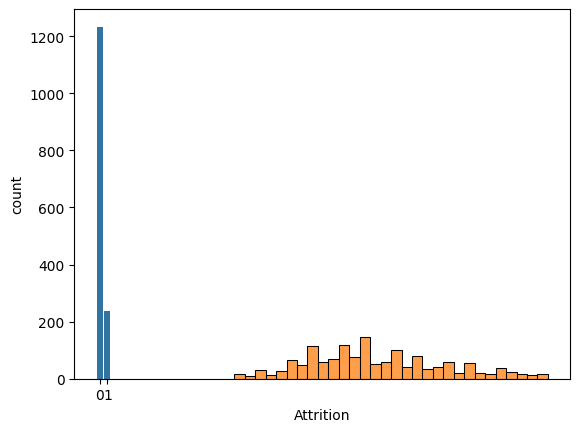

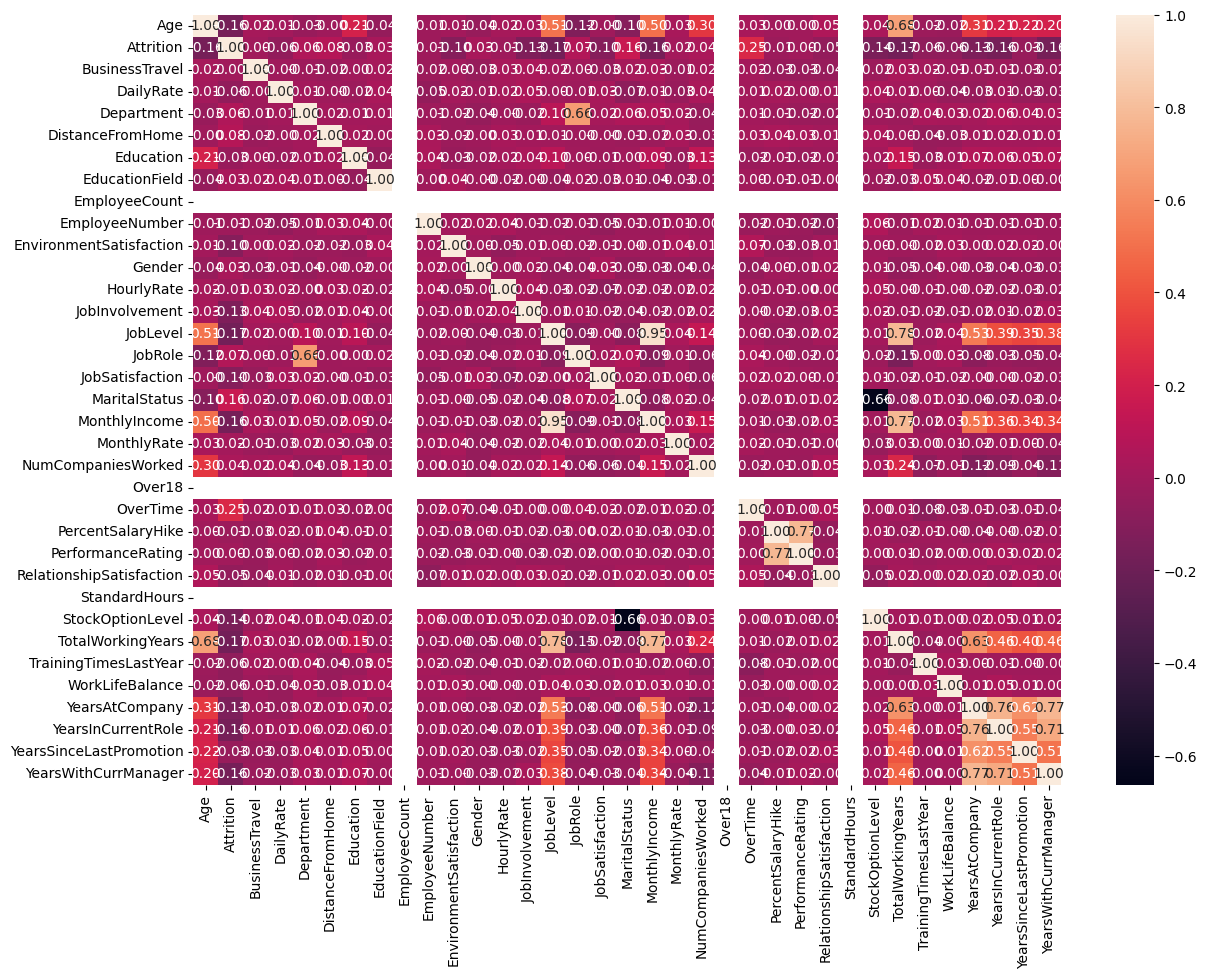

In [6]:
# Step 4: Exploratory Data Analysis (EDA)   
import matplotlib.pyplot as plt
import seaborn as sns

# Check the balance of the target variable 'Attrition'
sns.countplot(x='Attrition', data=HR)

# Check the distribution of ages among employees
sns.histplot(HR['Age'], bins=30)

# Encode 'Over18' column to numerical values if it exists
if 'Over18' in HR.columns:
	HR['Over18'] = HR['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

# Check the correlation between features
plt.figure(figsize=(14,10))
sns.heatmap(HR.corr(), annot=True, fmt=".2f")



In [8]:
#Step 5: Feature Engineering   
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Convert categorical features to numerical using LabelEncoder
for column in HR.select_dtypes(include=['object']).columns:
    lbl = LabelEncoder()
    HR[column] = lbl.fit_transform(HR[column])

# Normalize numerical features so they're on the same scale
scaler = MinMaxScaler()
for column in HR.select_dtypes(include=['int64', 'float64']).columns:
    HR[column] = scaler.fit_transform(HR[[column]])
    print(f"Normalized {column}")   




Normalized Age
Normalized Attrition
Normalized BusinessTravel
Normalized DailyRate
Normalized Department
Normalized DistanceFromHome
Normalized Education
Normalized EducationField
Normalized EmployeeCount
Normalized EmployeeNumber
Normalized EnvironmentSatisfaction
Normalized Gender
Normalized HourlyRate
Normalized JobInvolvement
Normalized JobLevel
Normalized JobRole
Normalized JobSatisfaction
Normalized MaritalStatus
Normalized MonthlyIncome
Normalized MonthlyRate
Normalized NumCompaniesWorked
Normalized Over18
Normalized OverTime
Normalized PercentSalaryHike
Normalized PerformanceRating
Normalized RelationshipSatisfaction
Normalized StandardHours
Normalized StockOptionLevel
Normalized TotalWorkingYears
Normalized TrainingTimesLastYear
Normalized WorkLifeBalance
Normalized YearsAtCompany
Normalized YearsInCurrentRole
Normalized YearsSinceLastPromotion
Normalized YearsWithCurrManager


In [ ]:
# Step 6: Data Modelling & Training

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = HR.drop('Attrition', axis=1)
y = HR['Attrition']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)





RandomForestClassifier()

In [10]:
# Step 7: Model Evaluation  
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       255
         1.0       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [17]:
# Example of how to use the model to predict employee attrition:
#Define a new employee's data
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
employee_data = pd.DataFrame({
    'Age': [35],
    'BusinessTravel': ['Travel_Rarely'],
    'DailyRate': [900],
    'Department': ['Research & Development'],
    'DistanceFromHome': [10],
    'Education': [3],
    'EducationField': ['Life Sciences'],
    'EnvironmentSatisfaction': [3],
    'Gender': ['Male'],
    'HourlyRate': [40], 
    'JobInvolvement': [3],  
    'JobLevel': [2],
    'JobRole': ['Research Scientist'],
    'JobSatisfaction': [3],
    'MaritalStatus': ['Married'],
    'MonthlyIncome': [5000],
    'MonthlyRate': [15000],
    'NumCompaniesWorked': [1],
    'OverTime': ['No'],
    'PercentSalaryHike': [15],
    'PerformanceRating': [3],
    'RelationshipSatisfaction': [4],
    'StockOptionLevel': [1],
    'TotalWorkingYears': [10],
    'TrainingTimesLastYear': [2],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [5],
    'YearsInCurrentRole': [4],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [4]
})

# Align employee_data columns with X_train columns
employee_data = employee_data.reindex(columns=X_train.columns, fill_value=0)

# Apply the same preprocessing steps as the training data
for column in employee_data.columns:
    if column in label_encoders:  # Use pre-trained LabelEncoders
        employee_data[column] = label_encoders[column].transform(employee_data[column])

# Scaling
for column in employee_data.select_dtypes(include=['int64', 'float64']).columns:
    if column in scaler.feature_names_in_:  # Ensure the column was part of the scaler
        employee_data[column] = scaler.transform(employee_data[[column]])  # Use the pre-trained scaler

# Use the model to predict
attrition_prediction = model.predict(employee_data)

if attrition_prediction == 1:
    print("The model predicts that the employee will leave.")
else:
    print("The model predicts that the employee will stay.")

if attrition_prediction == 1:
    print("The model predicts that the employee will leave.")
else:
    print("The model predicts that the employee will stay.")




The model predicts that the employee will stay.
The model predicts that the employee will stay.
